In [2]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

df = pd.read_csv("annonimized.csv")  # ví dụ: "data.csv"
ck=pd.read_csv("ck-public.csv")
df.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [3]:
df.rename(columns={
    "concat('it001',`assignment_id`)": 'assignment_id',
    "concat('it001',`problem_id`)": 'problem_id',
    "concat('it001', username)": 'username',
    "concat('it001',`language_id`)":'language_id'
}, inplace=True)
ck.rename(columns={
    "hash": "username",
}, inplace=True)
df.head()

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   assignment_id  295198 non-null  object
 1   problem_id     295198 non-null  object
 2   username       295198 non-null  object
 3   is_final       295198 non-null  int64 
 4   status         295198 non-null  object
 5   pre_score      295198 non-null  int64 
 6   coefficient    295198 non-null  int64 
 7   language_id    295198 non-null  object
 8   created_at     295198 non-null  object
 9   updated_at     295198 non-null  object
 10  judgement      295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [5]:
#Dữ liệu gồm 295,198 dòng và 11 cột
#Không có giá trị nào bị thiếu (NaN), vì tất cả các cột đều có:

In [7]:
import pandas as pd
import json

# Giả sử bạn đã đọc file CSV:
# df = pd.read_csv("submissions.csv")

# Bước 1: Tiền xử lý thời gian
df['created_at'] = pd.to_datetime(df['created_at'], format='%m-%d %H:%M:%S', errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], format='%m-%d %H:%M:%S', errors='coerce')
df['submit_date'] = df['created_at'].dt.date

# Bước 2: Thời gian hoạt động mỗi lần nộp
df['active_duration'] = (df['updated_at'] - df['created_at']).dt.total_seconds()

# Bước 3: Cờ đánh dấu judgement > 0
def is_judgement_nonzero(j):
    try:
        data = json.loads(j)
        total = sum(sum(v) for v in data.values() if isinstance(v, list))
        return total > 0
    except:
        return False

df['judgement_nonzero'] = df['judgement'].apply(is_judgement_nonzero)

# Bước 4: Tính các đặc trưng

# Tổng số lần nộp
submit_counts = df.groupby("username").size().rename("total_submissions")

# Số problem tham gia
problem_counts = df.groupby("username")["problem_id"].nunique().rename("num_problems")

# Số assignment tham gia
assignment_counts = df.groupby("username")["assignment_id"].nunique().rename("num_assignments")

# Số ngày hoạt động
active_days = df.groupby("username")["submit_date"].nunique().rename("active_days")

# Tính điểm có trọng số cho mỗi lần nộp
df["weighted_score"] = df["pre_score"] * df["coefficient"]
# Tính tổng điểm có trọng số theo username
total_weighted_score = df.groupby("username")["weighted_score"].sum().rename("total_weighted_score")

# Tổng pre_score
total_prescore = df.groupby("username")["pre_score"].sum().rename("total_prescore")

# Số problem với is_final = 1
final_problem = df[df["is_final"] == 1].groupby("username")["problem_id"].nunique().rename("num_final_problems")

# Số problem có pre_score < 10000
low_score_problem = df[df["pre_score"] < 10000].groupby("username")["problem_id"].nunique().rename("num_low_score_problems")

# Tổng số lần nộp có judgement > 0
nonzero_judgement_submissions = df[df["judgement_nonzero"]].groupby("username").size().rename("nonzero_judgement_submissions")
# Tổng thời gian hoạt động mỗi ngày (cho mỗi username và ngày cụ thể)
daily_time = df.groupby(["username", "submit_date"])["active_duration"].sum()

# Sau đó tính trung bình theo từng username
avg_time_per_day = daily_time.groupby("username").mean().rename("avg_time_per_day")


# Bước 5: Gộp tất cả các đặc trưng
features2 = pd.concat([
    submit_counts,
    problem_counts,
    assignment_counts,
    active_days,
    total_prescore,
    final_problem,
    low_score_problem,
    nonzero_judgement_submissions,
    total_weighted_score,
    avg_time_per_day
], axis=1).fillna(0)

# (Tùy chọn) Xuất ra file CSV
# features.to_csv("user_features.csv")
features2 = features2.reset_index()
features2= pd.DataFrame(features2)
# In kết quả
features2


,username,total_submissions,num_problems,num_assignments,active_days,total_prescore,num_final_problems,num_low_score_problems,nonzero_judgement_submissions,total_weighted_score,avg_time_per_day
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,7,14,809110,45.0,27.0,16.0,80911000,8.605200e+04
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,9,20,1421535,78.0,46.0,29.0,142153500,-3.008344e+06
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,66,7,25,1164882,65.0,29.0,34.0,116488200,-8.035625e+05
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,4,13,595276,47.0,17.0,7.0,59527600,1.164685e+04
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,52,8,8,692766,52.0,19.0,14.0,68680200,2.461500e+03
...,...,...,...,...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,34,9,7,413000,34.0,13.0,0.0,41300000,2.060714e+03
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,77,6,16,1613185,77.0,39.0,10.0,161318500,1.586587e+05
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,100,6,48,2184330,100.0,58.0,49.0,218433000,-1.022273e+06
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,34,7,7,408273,34.0,21.0,8.0,40827300,1.298381e+05


In [8]:
df_merged1 = pd.merge(features2,ck, on="username", how="inner")
df_merged1

,username,total_submissions,num_problems,num_assignments,active_days,total_prescore,num_final_problems,num_low_score_problems,nonzero_judgement_submissions,total_weighted_score,avg_time_per_day,CK
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,7,14,809110,45.0,27.0,16.0,80911000,8.605200e+04,5.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,9,20,1421535,78.0,46.0,29.0,142153500,-3.008344e+06,6.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,66,7,25,1164882,65.0,29.0,34.0,116488200,-8.035625e+05,4.5
3,013de369c439ab0ead8aa7da64423aa395a8be39,107,52,8,8,692766,52.0,19.0,14.0,68680200,2.461500e+03,5.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,90,9,22,1042765,90.0,45.0,4.0,104276500,-2.287943e+06,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,111,43,6,15,574052,42.0,23.0,5.0,57405200,1.986640e+05,5.5
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,357,104,17,29,1708325,104.0,64.0,17.0,170832500,-1.435900e+06,6.0
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,155,52,8,10,658331,52.0,21.0,6.0,65833100,7.109127e+05,6.0
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,557,114,12,33,2383183,114.0,85.0,65.0,238318300,-8.072120e+05,7.0


In [10]:
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   username                       761 non-null    object 
 1   total_submissions              761 non-null    int64  
 2   num_problems                   761 non-null    int64  
 3   num_assignments                761 non-null    int64  
 4   active_days                    761 non-null    int64  
 5   total_prescore                 761 non-null    int64  
 6   num_final_problems             761 non-null    float64
 7   num_low_score_problems         761 non-null    float64
 8   nonzero_judgement_submissions  761 non-null    float64
 9   total_weighted_score           761 non-null    int64  
 10  avg_time_per_day               761 non-null    float64
 11  CK                             755 non-null    float64
dtypes: float64(5), int64(6), object(1)
memory usage: 7

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6704\4183994339.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


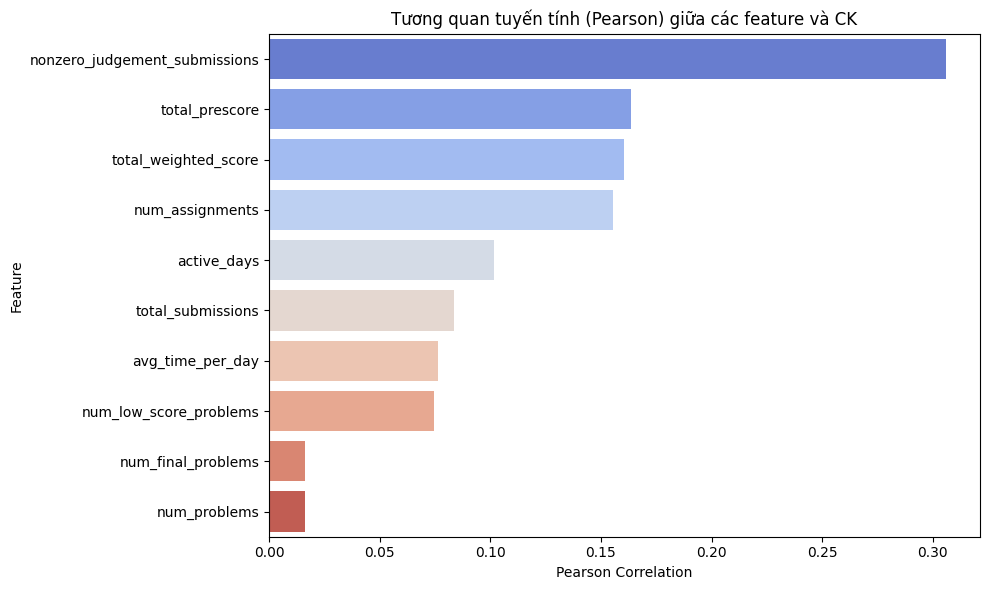

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử bạn đã có DataFrame df_merged1 với các cột:
# ['username', 'total_submissions', ..., 'avg_time_per_day', 'CK']

# 1. Đảm bảo CK là numeric
df_merged1['CK'] = pd.to_numeric(df_merged1['CK'], errors='coerce')

# 2. Tính hệ số tương quan Pearson giữa các feature và CK
corr_with_ck = (
    df_merged1
    .drop(columns=['username'])
    .corrwith(df_merged1['CK'], numeric_only=True)
    .drop('CK')              # loại bỏ tự tương quan
    .sort_values(ascending=False)
)

# 3. Vẽ barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=corr_with_ck.values,
    y=corr_with_ck.index,
    palette='coolwarm'
)
plt.title('Tương quan tuyến tính (Pearson) giữa các feature và CK')
plt.xlabel('Pearson Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



biểu đồ trên thể hiện sự tương quan giữa các feature với CK Nhận thấy rằng các tiêu chí đã lọc nó quan hệ tuyến tính thuận với điểm quá trình (tiến về 1) do nó phản ánh năng lực siêng năng của sinh viên

In [13]:
# 1. Xoá các dòng thiếu điểm CK
df_merged2 = df_merged1.dropna(subset=["CK"])

# 2. Chia X, y
X = df_merged2.drop(columns=["CK", "username",])
y = df_merged2["CK"]

# 3. Chia tập train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# 🔄 4. Scale dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Huấn luyện Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# 6. Dự đoán và đánh giá
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test_scaled)
print("📊 MAE:", mean_absolute_error(y_test, y_pred))
print("📈 R²:", r2_score(y_test, y_pred))

📊 MAE: 1.4536446238529361
📈 R²: 0.3037710163517252


In [16]:
# Đảm bảo không có cột dư thừa (CK hoặc index)
features3 = features2.reset_index() if features2.index.name == "username" else features2.copy()
features3 = features2.drop(columns=[col for col in ["index", "CK"] if col in features2.columns])

# Scale đúng các cột đặc trưng ban đầu
X_new = features3.drop(columns=["username"])
X_new_scaled = scaler.transform(X_new)

# Dự đoán
features2["CK"] = model.predict(X_new_scaled).round(1)




✅ Best RandomForest Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
✅ Best SVR Params: {'C': 10, 'epsilon': 0.5, 'kernel': 'rbf'}

🎯 Kết quả so sánh mô hình:
                        Model       MAE        R²
2                         SVR  1.430678  0.338827
4            SVR (GridSearch)  1.453070  0.335927
0           Linear Regression  1.453645  0.303771
3  Random Forest (GridSearch)  1.472846  0.272761
1               Random Forest  1.493026  0.255744


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6704\2554002924.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R²", palette="viridis")


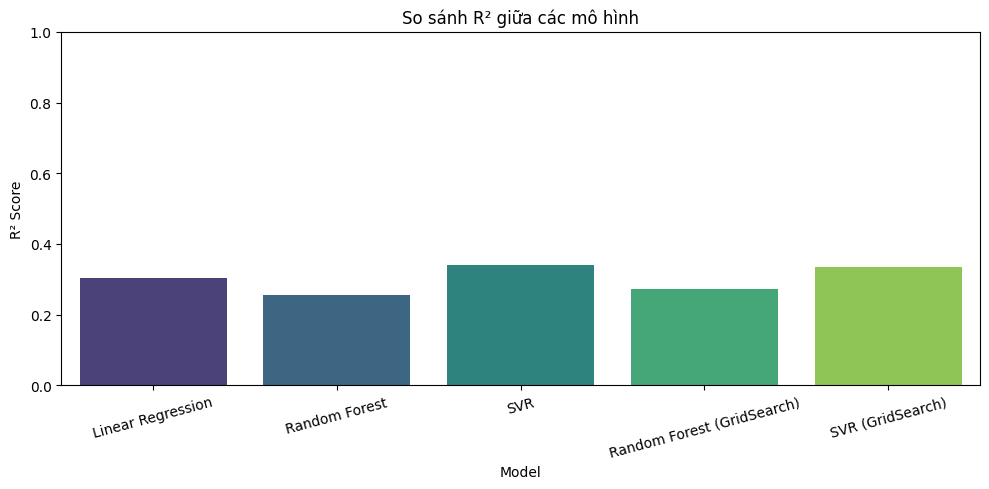

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Xoá các dòng thiếu điểm CK
df_merged3 = df_merged2.dropna(subset=["CK"])

# 2. Chia X, y
X = df_merged3.drop(columns=["CK", "username"])
y = df_merged3["CK"]

# 3. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# 4. Scale dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. GridSearch cho RandomForest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}
grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_
print("✅ Best RandomForest Params:", grid_rf.best_params_)

# 6. GridSearch cho SVR
param_grid_svr = {
    "C": [0.1, 1, 10],
    "epsilon": [0.1, 0.2, 0.5],
    "kernel": ["rbf", "linear"]
}
grid_svr = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid_svr,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)
grid_svr.fit(X_train_scaled, y_train)
best_svr = grid_svr.best_estimator_
print("✅ Best SVR Params:", grid_svr.best_params_)

# 7. Tạo models sau khi đã có best_rf và best_svr
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "Random Forest (GridSearch)": best_rf,
    "SVR (GridSearch)": best_svr,
}

# 8. Huấn luyện và đánh giá
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "R²": r2})

# 9. Hiển thị kết quả
results_df = pd.DataFrame(results)
print("\n🎯 Kết quả so sánh mô hình:")
print(results_df.sort_values(by="R²", ascending=False))

# 10. Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x="Model", y="R²", palette="viridis")
plt.title("So sánh R² giữa các mô hình")
plt.ylim(0, 1)
plt.ylabel("R² Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



In [21]:
# Đảm bảo không có cột dư thừa (tránh lỗi scale)
features4 = features2.reset_index() if features2.index.name == "username" else features2.copy()
features4 = features4.drop(columns=[col for col in ["index", "CK"] if col in features4.columns])

# Tạo bản sao để chứa kết quả dự đoán
features3 = features4[["username"]].copy()

# Lấy tập đặc trưng để dự đoán (loại bỏ cột username)
X_new = features4.drop(columns=["username"])

# Scale dữ liệu giống như lúc train
X_new_scaled = scaler.transform(X_new)

# Dự đoán bằng từng mô hình
for name, model in models.items():
    # Dự đoán và làm tròn
    features3["CK"] = model.predict(X_new_scaled).round(1)

    # Tạo tên file từ tên mô hình (loại bỏ dấu ngoặc và dấu cách)
    file_name = f"du_doan_ck_{name.lower().replace(' ', '_').replace('(', '').replace(')', '')}.csv"

    # Ghi kết quả ra file: chỉ gồm username và điểm CK
    features3[["username", "CK"]].to_csv(file_name, index=False)
    print(f"✅ Đã ghi file '{file_name}'")



✅ Đã ghi file 'du_doan_ck_linear_regression.csv'
✅ Đã ghi file 'du_doan_ck_random_forest.csv'
✅ Đã ghi file 'du_doan_ck_svr.csv'
✅ Đã ghi file 'du_doan_ck_random_forest_gridsearch.csv'
✅ Đã ghi file 'du_doan_ck_svr_gridsearch.csv'


1. SVR
MAE = 1.4307 → Đây là lỗi tuyệt đối trung bình thấp nhất → Mô hình dự đoán gần đúng điểm CK nhất trong các mô hình.
R² = 0.3388 → Khoảng 33.88% phương sai của điểm CK được mô hình giải thích. Tuy không quá cao, nhưng tốt nhất trong 5 mô hình đã thử.
->Nhận xét: Là mô hình hiệu quả nhất cả về độ chính xác và khả năng mô tả biến thiên. Đơn giản nhưng hiệu quả.

2. SVR (GridSearch)
MAE = 1.4531 → Sai số cao hơn SVR thường (~0.02).
R² = 0.3359 → Giảm nhẹ so với SVR thường (~0.003).
->Nhận xét: Dù đã tinh chỉnh tham số, hiệu quả không cải thiện, thậm chí hơi giảm. Điều này cho thấy:

3. Linear Regression
MAE = 1.4536 → Gần như tương đương SVR (GridSearch).
R² = 0.3038 → Giải thích được 30.38% phương sai, thấp hơn SVR một chút.
->Nhận xét: Dù là mô hình đơn giản, nhưng hiệu quả khá tốt và ổn định. Có thể là lựa chọn phù hợp nếu muốn mô hình nhanh, dễ triển khai.

4. Random Forest (GridSearch)
MAE = 1.4728 → Cao hơn Linear & SVR ~0.02.
R² = 0.2728 → Chỉ giải thích được 27.28% phương sai → thấp hơn 3 mô hình trên.
->Nhận xét: Dù đã dùng GridSearch, nhưng hiệu quả không cải thiện rõ rệt so với Random Forest thường. Có thể do dữ liệu quá ít hoặc không phù hợp với mô hình cây.

5. Random Forest
MAE = 1.4930 → Sai số lớn nhất trong 5 mô hình.
R² = 0.2557 → Hiệu quả thấp nhất, chỉ giải thích được 25.57% phương sai.
-> Nhận xét: Là mô hình yếu nhất trong nhóm. Dự đoán kém chính xác và mô tả dữ liệu không tốt. Nguyên nhân có thể là:

NOTE :

độ chính xác của bài toán không cao có nhiều nguyên nhân sau, có một số sinh viên nhận bài làm đúng từ bạn rồi nộp lên hệ thống nên thời gian làm bài ít ,số lần nộp ít mà điểm vẫn cao, bên cạnh đó vẫn có sinh viên tự lực làm nên dẫn đến không thể đánh giá chính xác được.
khi đi thi sinh viên có thể bị ảnh hưởng bởi các yêu tố bên ngoài như tâm lí, lo lắng, hoặc nếu hen có thể trúng tủ hoặc nhìn bài bạn dẫn đến điểm cao điểm thấp khó có thẻ đoán được .
bên cạnh đó vẫn có các thần đồng không học gì nhưng khi đi thi sẽ được điểm cao
với số lượng dự liệu khá ít nên đây cũng là một mặt hạn chế cho bài toán
Từ đó chúng em rút ra kết luận là bài toán dự đoán điểm cuối kì chưa thật sự tốt bởi vì các lí do đã nêu trên . Nếu muốn dự đoán tốt thì phải cần thêm nhiều dữ liệu và phải dựa trên tiêu chí "ai chăm thì sẽ giỏi" mới có thể cho kết quả tốt đc